In [2]:
!ls Applied-Deep-Learning-with-Keras

Lesson01  Lesson03  Lesson05  Lesson07	Lesson09  README.md
Lesson02  Lesson04  Lesson06  Lesson08	LICENSE


In [4]:
!ls Applied-Deep-Learning-with-Keras/Lesson02

백업		      cook_bank_data_feats.csv	 Exercise08.ipynb
Activity02.ipynb      cook_bank_data_target.csv  Exercise09.ipynb
bank_data_feats.csv   Exercise06.ipynb
bank_data_target.csv  Exercise07.ipynb


In [7]:
!ls Applied-Deep-Learning-with-Keras/Lesson02/data

cook_bank_data_feats.csv  cook_bank_data_target.csv


In [1]:
import pandas as pd

feats = pd.read_csv(
    'Applied-Deep-Learning-with-Keras/Lesson02/data/cook_bank_data_feats.csv',
    index_col = 0
)

target = pd.read_csv(
    'Applied-Deep-Learning-with-Keras/Lesson02/data/cook_bank_data_target.csv',
    index_col = 0
)

In [2]:
from sklearn.model_selection import train_test_split

test_size = 0.2
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    feats, target, test_size=test_size, random_state=random_state
)

In [3]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3616, 11)
(905, 11)
(3616, 1)
(905, 1)


In [4]:
from keras.models import Sequential

model = Sequential()

In [5]:
from keras.layers import Dense, Activation
from keras.models import Sequential


input_shape = X_train.shape[1]

# Dense(출력 개수, 활성화 함수, 입력 개수)
model.add(Dense(256, activation = 'tanh', input_dim = input_shape))

model.add(Dense(128, activation = 'tanh'))
model.add(Dense(96, activation = 'tanh'))
model.add(Dense(64, activation = 'tanh'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(32, activation = 'tanh'))
model.add(Dense(16, activation = 'tanh'))
model.add(Dense(8, activation = 'tanh'))

model.add(Dense(1, activation = 'sigmoid'))

In [6]:
model.compile(
    optimizer = 'adam',
    loss = 'binary_crossentropy',
    metrics = ['accuracy']
)

In [7]:
print(model.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               3072      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_2 (Dense)              (None, 96)                12384     
_________________________________________________________________
dense_3 (Dense)              (None, 64)                6208      
_________________________________________________________________
dense_4 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_5 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_6 (Dense)              (None, 16)                5

In [8]:
history = model.fit(
    x=X_train, y=y_train['y'],
    epochs=10, batch_size=32, validation_split=0.2
)

Epoch 1/10
91/91 [==============================] - 0s 3ms/step - loss: 0.3728 - accuracy: 0.8693 - val_loss: 0.3305 - val_accuracy: 0.8936
Epoch 2/10
91/91 [==============================] - 0s 1ms/step - loss: 0.3479 - accuracy: 0.8804 - val_loss: 0.3295 - val_accuracy: 0.8936
Epoch 3/10
91/91 [==============================] - 0s 1ms/step - loss: 0.3414 - accuracy: 0.8800 - val_loss: 0.3095 - val_accuracy: 0.8936
Epoch 4/10
91/91 [==============================] - 0s 1ms/step - loss: 0.3312 - accuracy: 0.8804 - val_loss: 0.3042 - val_accuracy: 0.8936
Epoch 5/10
91/91 [==============================] - 0s 1ms/step - loss: 0.3233 - accuracy: 0.8776 - val_loss: 0.3109 - val_accuracy: 0.8936
Epoch 6/10
91/91 [==============================] - 0s 1ms/step - loss: 0.3232 - accuracy: 0.8814 - val_loss: 0.3113 - val_accuracy: 0.8964
Epoch 7/10
91/91 [==============================] - 0s 1ms/step - loss: 0.3233 - accuracy: 0.8804 - val_loss: 0.3011 - val_accuracy: 0.8936
Epoch 8/10
91/91 [==

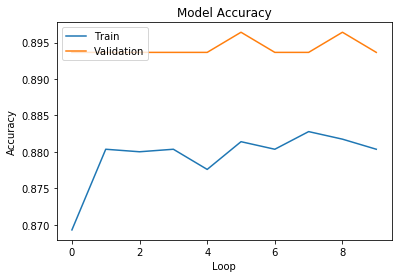

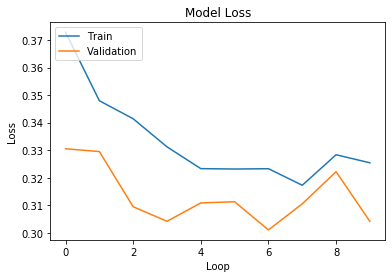

In [9]:
import matplotlib.pyplot as plt

# 학습 및 검증 정확성 값 도식화
accuracy_f = plt.plot(history.history['accuracy'])
val_accuracy_f = plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Loop')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



# 학습 및 검증 손실 값 도식화
loss_f = plt.plot(history.history['loss'])
val_loss_f = plt.plot(history.history['val_loss'])

plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Loop')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()



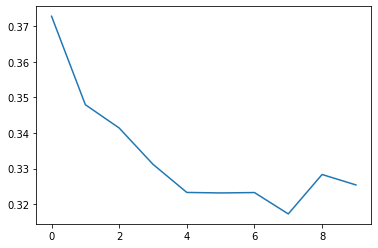

In [10]:
print(plt.plot(history.history['loss']))

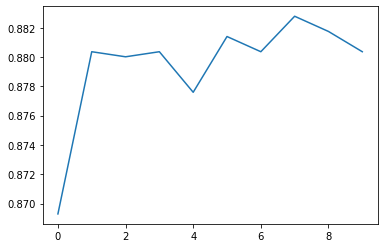

In [12]:
print(plt.plot(history.history['accuracy']))

In [11]:
print(history.history['loss'])

[0.3728037476539612, 0.34794825315475464, 0.341399610042572, 0.3312021791934967, 0.32329878211021423, 0.3231565058231354, 0.32326871156692505, 0.3172646760940552, 0.32833966612815857, 0.32540881633758545]


In [12]:
# 파이썬 서버 구축

In [13]:
from flask import Flask, jsonify

import requests
import json

In [14]:
# pip install flask_restful
from flask_restful import Resource, Api, reqparse

In [17]:
app = Flask(__name__)
api = Api(app)

@app.route('/dataServer')
def PythonServerResponse():
    print("It's operate")
    
   
    summary = {
                'accuracy' : history.history['accuracy'],
                'val_accuracy': history.history['val_accuracy'],
                'loss': history.history['loss'],
                'val_loss': history.history['val_loss']             
              }
    return jsonify(summary)

app.run()

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)
127.0.0.1 - - [09/Jul/2020 17:55:36] "GET /dataServer HTTP/1.1" 200 -


It's operate
